<h1> Sistemas Inteligentes </h1>
<h1> Práctica de Aprendizaje Supervisado </h1>

En esta práctica vamos a ver cómo se hace el entrenamiento de un método de aprendizaje supervisado en la librería scikit learn para python.

Las tareas a realizar son:
-  Cargar el conjunto de datos
-  Preparar los conjuntos de entrenamiento y prueba
-  Probar el modelo construido con un conjunto de prueba
-  Aplicar métricas de desempeño para evaluar el desempeño del modelo

Mayo de 2020 <br/>
Autor: G. Alvarez

In [98]:
# Documentación
# X_Train : los datos con los que se va entrenar el modelo
# y_train : Las respuestas de ese conjunto de datos (X_Train)
# X_test : son un conjunto de datos diferente para probar el modelo
# y_test : es la respuesta de ese conjunto de datos diferente

/-------------------------------------/
Iteracion:  1
SVM
---------------------------------------
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Matriz de confusión
[[2274  873]
 [ 906 2217]]
Precision:  0.7174757281553398
Recall:     0.7098943323727186
F1score:    0.7136648961854176
Reporte               precision    recall  f1-score   support

           0       0.72      0.72      0.72      3147
           1       0.72      0.71      0.71      3123

    accuracy                           0.72      6270
   macro avg       0.72      0.72      0.72      6270
weighted avg       0.72      0.72      0.72      6270



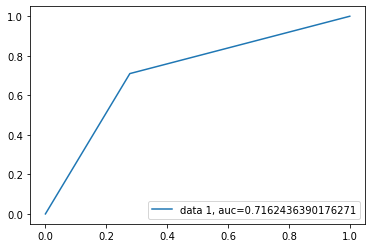

ARBOL DE DECISIÓN
---------------------------------------
Matriz de confusión sin re ajuste
[[2423  724]
 [ 715 2408]]
/----SIN RE AJUSTE----/
Precision:  0.768837803320562
Recall:     0.771053474223503
F1score:    0.7699440447641887
Reporte               precision    recall  f1-score   support

           0       0.77      0.77      0.77      3147
           1       0.77      0.77      0.77      3123

    accuracy                           0.77      6270
   macro avg       0.77      0.77      0.77      6270
weighted avg       0.77      0.77      0.77      6270



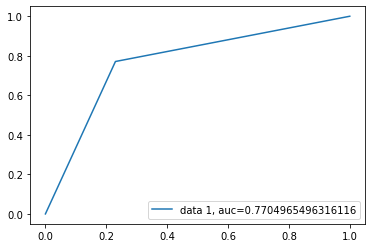

Matriz de confusión con re ajuste
[[2268  879]
 [ 415 2708]]
/-----CON RE-AJUSTE-----/
Precision:  0.7549484248675774
Recall:     0.867114953570285
F1score:    0.8071535022354696
Reporte               precision    recall  f1-score   support

           0       0.85      0.72      0.78      3147
           1       0.75      0.87      0.81      3123

    accuracy                           0.79      6270
   macro avg       0.80      0.79      0.79      6270
weighted avg       0.80      0.79      0.79      6270



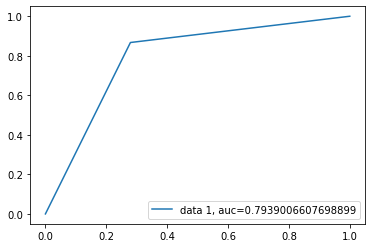

REGRESIÓN LOGISTICA
---------------------------------------
Matriz de confusión
[[2472  675]
 [ 737 2386]]
Precision:  0.779483828814113
Recall:     0.7640089657380724
F1score:    0.7716688227684347
Reporte               precision    recall  f1-score   support

           0       0.77      0.79      0.78      3147
           1       0.78      0.76      0.77      3123

    accuracy                           0.77      6270
   macro avg       0.77      0.77      0.77      6270
weighted avg       0.77      0.77      0.77      6270



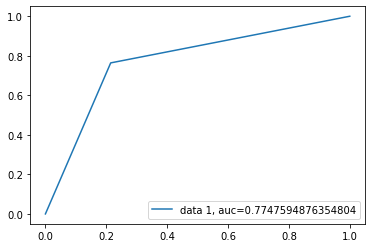

/--------MEDIA Y DESVIACIÓN DE LOS DATOS----------/
* Resultados SVM
    Promedio Recall después de 1 iteraciones: 0.3587378640776699
    Promedio Presición después de 1 iteraciones: 0.3549471661863593
    Promedio F1 después de 1 iteraciones: 0.3568324480927088
    Desviación estándar Recall después de 1 iteraciones: 0.3587378640776699
    Desviación estándar Presición después de 1 iteraciones: 0.3549471661863593
    Desviación estándar F1 después de 1 iteraciones: 0.3568324480927088
* Resultados ARBOL DE DECISIÓN SIN RE AJUSTE
    Promedio Recall después de 1 iteraciones: 0.384418901660281
    Promedio Presición después de 1 iteraciones: 0.3855267371117515
    Promedio F1 después de 1 iteraciones: 0.3849720223820943
    Desviación estándar Recall después de 1 iteraciones: 0.384418901660281
    Desviación estándar Presición después de 1 iteraciones: 0.3855267371117515
    Desviación estándar F1 después de 1 iteraciones: 0.3849720223820943
* Resultados ARBOLES DE DECISIÓN CON RE AJUSTE

In [99]:
#VARIABLES GLOBALES
N=1
profundidad_Arbol=3
sizeTest=0.4
PRESICION_SVM = [0 for _ in range(N)]  # Presición
RECALL_SVM = [0 for _ in range(N)]      # Recall
F1SCORE_SVM= [0 for _ in range(N)]   # F1 Score
PRESICION_DTCR = [0 for _ in range(N)]  # Presición
RECALL_DTCR = [0 for _ in range(N)]     # Recall
F1SCORE_DTCR = [0 for _ in range(N)]   # F1 Score
PRESICION_DTSR = [0 for _ in range(N)]  # Presición
RECALL_DTSR = [0 for _ in range(N)]       # Recall
F1SCORE_DTSR = [0 for _ in range(N)]   # F1 Score
PRESICION_RL = [0 for _ in range(N)]  # Presición
RECALL_RL = [0 for _ in range(N)]       # Recall
F1SCORE_RL = [0 for _ in range(N)]   # F1 Score
main(N,sizeTest,profundidad_Arbol)

In [100]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
#data

In [101]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [102]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

 <=50K    24720
 >50K      7841
Name: C, dtype: int64


Las actividades siguientes corresponden al preprocesamiento de los datos para poderlos utilizar en el entrenamiento. Esta es una etapa importante y necesaria, a continuación se muestra la forma cómo se hace, aunque el propósito de la práctica tiene que ver más con la realización del entrenamiento, por lo que no se explicará en detalle.

In [103]:
# Eliminar los registros que tienen más de 2 datos faltantes
data = data.dropna(axis = 0, thresh = 13)
print(data.shape)

# Reemplazar los datos faltantes por la moda en los atributos Workclass, Occupation, Country
data.Workclass.fillna(data.Workclass.mode()[0], inplace=True)
data.Occupation.fillna(data.Workclass.mode()[0], inplace=True)
data.Country.fillna(data.Workclass.mode()[0], inplace=True)

# Convertir los atributos categóricos a escala numérica
# Esto modifica los valores de todas las columnas, incluso las numéricas
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform) 

# Balanceo entre clases
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal.shape

(32534, 15)


(15674, 15)

In [104]:
# Separacion de los datos en conjuntos de entrenamiento, validacion y prueba. Se trabaja sobre el conjunto balanceado
# Cuando finalice la depuración recordar quitar el parámetro random_state.
X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['C'],axis=1), dataBal['C'], test_size=0.4, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (9404, 14)
X_test: (6270, 14)
y_train: (9404,)
y_test: (6270,)


In [105]:
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

#from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def SVM_FUN(X_train, X_test, y_train, y_test):
    # Se crea el clasificador base
    clf = SVC()

    # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = [{'kernel': ['rbf', 'sigmoid'], 
    #parameter_space = [{'kernel': ['rbf'], 
                         'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100]
                        }]

    # Se realiza la estimacion de parametros, en clf queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    # Se identifican los parametros que producen el mejor modelo
    print("Mejores parametros:")
    print(clf.best_params_)

    # Se hace la prediccion sobre los datos de prueba
    pred = clf.predict(X_test)

    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    print("Matriz de confusión") 
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Creando vectores con las metricas acumuladas para encontrar la media y la varianza de la N iteraciones
    PRESICION_SVM.append(pre)  # Presición
    RECALL_SVM.append(rec) # Recall
    F1SCORE_SVM.append(f1Score)   # F1 Score
    
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, pred))
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
    auc = metrics.roc_auc_score(y_test, pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    

In [106]:
#Punto 2
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def ARBOL_DE_DECISION(profundidadArbol, X_train, X_test, y_train, y_test):
    # Clasificador de arbol de desiciones
    arbol = DecisionTreeClassifier()
    
    # Entrenamiento del modelo
    arbol.fit(X_train, y_train)
    
    # Predicción
    pred = arbol.predict(X_test)
    
    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    print("Matriz de confusión sin re ajuste")
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Creando vectores con las metricas acumuladas para encontrar la media y la varianza de la N iteraciones
    PRESICION_DTSR.append(pre)  # Presición
    RECALL_DTSR.append(rec)       # Recall
    F1SCORE_DTSR.append(f1Score)   # F1 Score
    
    
    print("/----SIN RE AJUSTE----/")
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, pred))
    
    fpr, tpr, _ = metrics.roc_curve(y_test, pred)
    auc = metrics.roc_auc_score(y_test, pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    # Re-ajuste del arbol estableciendo número de profundidad máximo
    arbol = DecisionTreeClassifier(max_depth=profundidadArbol)
    
    # Entrenamiento del modelo con Re Ajuste
    arbol.fit(X_train, y_train)
    
    # Predicción
    y_pred = arbol.predict(X_test)
    
    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión con re ajuste")
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1Score = f1_score(y_test,y_pred)
    
    # Creando vectores con las metricas acumuladas para encontrar la media y la varianza de la N iteraciones
    PRESICION_DTCR.append(pre) # Presición
    RECALL_DTCR.append(rec)       # Recall
    F1SCORE_DTCR.append(f1Score)   # F1 Score
    
    print("/-----CON RE-AJUSTE-----/")
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, y_pred))
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [107]:
#Punto 2
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def REGRESION_LOGISTICA(X_train, X_test, y_train, y_test):
    # Se escalan todos los datos
    escalar = StandardScaler()
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)
    
    # Entrenamiento de los modelos
    algoritmo = LogisticRegression()
    
    algoritmo.fit(X_train,y_train)
    
    # Se realiza una predicción
    y_pred = algoritmo.predict(X_test)
    
    # Matriz de confusión 
    mat = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión")
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1Score = f1_score(y_test,y_pred)
    
    # Creando vectores con las metricas acumuladas para encontrar la media y la varianza de la N iteraciones
    PRESICION_RL.append(pre) # Presición
    RECALL_RL.append(rec)# Recall
    F1SCORE_RL.append(f1Score)  # F1 Score
    
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, y_pred))
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [108]:
from numpy import average
from numpy import std

def main(N, sizeTest,profundidad_Arbol):
    X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['C'],axis=1), dataBal['C']
                                                        , test_size=sizeTest)
    for i in range(N): # Llamado del agente para revisar las metricas
        print("/-------------------------------------/")
        print("Iteracion: ", i + 1)
        print("SVM")
        print("---------------------------------------")
        SVM_FUN(X_train, X_test, y_train, y_test)
        print("ARBOL DE DECISIÓN")
        print("---------------------------------------")
        ARBOL_DE_DECISION(profundidad_Arbol, X_train, X_test, y_train, y_test)
        print("REGRESIÓN LOGISTICA")
        print("---------------------------------------")
        REGRESION_LOGISTICA(X_train, X_test, y_train, y_test)

    print("/--------MEDIA Y DESVIACIÓN DE LOS DATOS----------/")

    print("* Resultados SVM")

    print("    Promedio Recall después de {0} iteraciones: {1}".format(N, average(PRESICION_SVM)))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N, average(RECALL_SVM)))
    print("    Promedio F1 score después de {0} iteraciones: {1}".format(N,average(F1SCORE_SVM)))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(PRESICION_SVM)))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(RECALL_SVM)))
    print("    Desviación estándar F1 score después de {0} iteraciones: {1}".format(N,std(F1SCORE_SVM)))

    print("* Resultados ARBOL DE DECISIÓN SIN RE AJUSTE")
    
    print("    Promedio Recall después de {0} iteraciones: {1}".format(N,average(PRESICION_DTSR)))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N,average(RECALL_DTSR)))
    print("    Promedio F1 score después de {0} iteraciones: {1}".format(N,average(F1SCORE_DTSR)))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(PRESICION_DTSR)))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(RECALL_DTSR)))
    print("    Desviación estándar F1 score después de {0} iteraciones: {1}".format(N,std(F1SCORE_DTSR)))

    print("* Resultados ARBOLES DE DECISIÓN CON RE AJUSTE")
    
    print("    Promedio Recall después de {0} iteraciones: {1}".format(N,average(PRESICION_DTCR)))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N,average(RECALL_DTCR)))
    print("    Promedio F1 score después de {0} iteraciones: {1}".format(N,average(F1SCORE_DTCR)))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(PRESICION_DTCR)))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(RECALL_DTCR)))
    print("    Desviación estándar F1 score después de {0} iteraciones: {1}".format(N,std(F1SCORE_DTCR)))

    print("* Resultados REGRESIÓN LOGISTICA")
    
    print("    Promedio Recall después de {0} iteraciones: {1}".format(N,average(PRESICION_RL)))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N,average(RECALL_RL)))
    print("    Promedio F1 score después de {0} iteraciones: {1}".format(N,average(F1SCORE_RL)))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(PRESICION_RL)))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(RECALL_RL)))
    print("    Desviación estándar F1 score después de {0} iteraciones: {1}".format(N,std(F1SCORE_RL)))


    


<h1> Actividades a realizar a partir de este script básico: </h1>
1.  Implementar el método holdout para obtener unas métricas de desempeño más confiables. Hacer 5 iteraciones  de las etapas de: partición de los datos - entrenamiento - prueba - calculo de metricas. No olvidar liberar la semilla del generador de números aleatorios.
<br></br>
2.  Adicionar dos métodos para poder comparar su desempeño, los métodos a adicionar son: árbol de decisiones y clasificacador por regresión logística.
<br></br>
3.  Mostrar los resultados comparativos gráficamente, incluyendo la visualización de las curvas ROC por cada método y el valor del área bajo la curva.